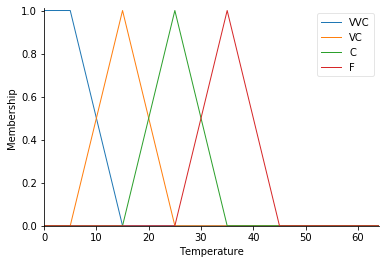

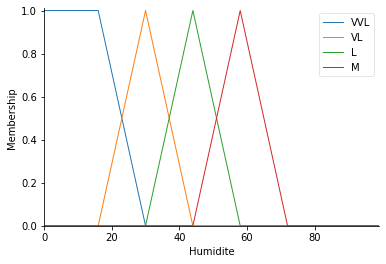

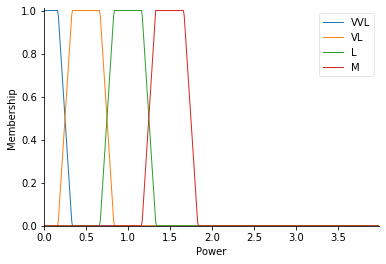

In [14]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#import matplotlib.pyplot as plt

# Creation des entres et sorties de la logique floue
temperature = ctrl.Antecedent(np.arange(0, 65, 1), 'Temperature')
humidite = ctrl.Antecedent(np.arange(0, 100, 1), 'Humidite')
power = ctrl.Consequent(np.arange(0, 4, .01) , 'Power')

# Creation automatique de pics possibles 
#temperature.automf(7)
#humidite.automf(7)


# Enregistrement des pics de temperatures 
temperature['VVC'] = fuzz.trapmf(temperature.universe, [0, 0, 5, 15])
temperature['VC'] = fuzz.trimf(temperature.universe, [5, 15, 25])
temperature['C'] = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature['F'] = fuzz.trimf(temperature.universe, [25, 35, 45])

# Enregistrement des pics d' humidite
humidite['VVL'] = fuzz.trapmf(humidite.universe, [0, 0,16,30])
humidite['VL'] = fuzz.trimf(humidite.universe, [16,30,44])
humidite['L'] = fuzz.trimf(humidite.universe, [30,44,58])
humidite['M'] = fuzz.trimf(humidite.universe, [44,58,72])

# Enregistrement des pics de power
power['VVL'] = fuzz.trapmf(power.universe, [0, 0, .166,.333])
power['VL'] = fuzz.trapmf(power.universe, [.166,.333, .666 ,.833])
power['L'] = fuzz.trapmf(power.universe, [.666,.833, 1.166, 1.333])
power['M'] = fuzz.trapmf(power.universe, [1.166,1.33, 1.666,1.833])

temperature.view()
humidite.view()
power.view()


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x189ba22c508>)

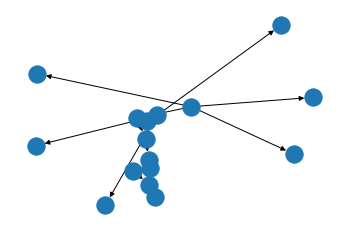

In [17]:
#First Column Case 
rule1 = ctrl.Rule(temperature['VVC'] & humidite['VVL'] , power['VVL'])
rule2 = ctrl.Rule(temperature['VVC'] & humidite['VL'] , power['VVL'])
rule3 = ctrl.Rule(temperature['VVC'] & humidite['L'] , power['VL'])
rule4 = ctrl.Rule(temperature['VVC'] & humidite['M'] , power['VL'])

#Second Column case
rule5 = ctrl.Rule(temperature['VC'] & humidite['VVL'] , power['VVL'])
rule6 = ctrl.Rule(temperature['VC'] & humidite['VL'] , power['VL'])
rule7 = ctrl.Rule(temperature['VC'] & humidite['L'] , power['VL'])
rule8 = ctrl.Rule(temperature['VC'] & humidite['M'] , power['L'])

#third Column case 
rule9 = ctrl.Rule(temperature['C'] & humidite['VVL'] , power['VVL'])
rule10 = ctrl.Rule(temperature['C'] & humidite['VL'] , power['VVL'])
rule11 = ctrl.Rule(temperature['C'] & humidite['L'] , power['VL'])
rule12 = ctrl.Rule(temperature['C'] & humidite['M'] , power['L'])

#third Column case 
rule13 = ctrl.Rule(temperature['F'] & humidite['VVL'] , power['VL'])
rule14 = ctrl.Rule(temperature['F'] & humidite['VL'] , power['L'])
rule15 = ctrl.Rule(temperature['F'] & humidite['L'] , power['L'])
rule16 = ctrl.Rule(temperature['F'] & humidite['M'] , power['M'])

rule1.view()

0.49949177677526624


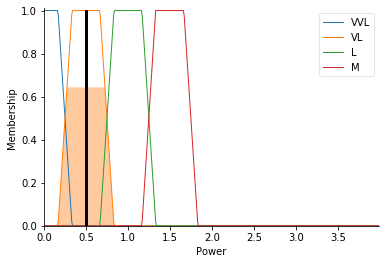

In [19]:
#Add all rules in a rules Array
rules = [rule1, rule2, rule3, rule4 ,rule5, rule6, rule7, rule8]
rules += [rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16]

#Push rules to system
power_ctrl =  ctrl.ControlSystem(rules)

powering = ctrl.ControlSystemSimulation(power_ctrl)

powering.input['Temperature'] = 15
powering.input['Humidite'] = 35

powering.compute()

print(powering.output['Power'])
power.view(sim=powering)

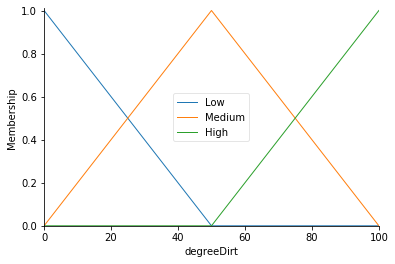

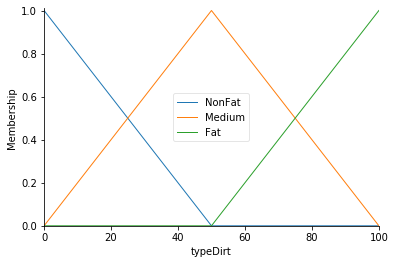

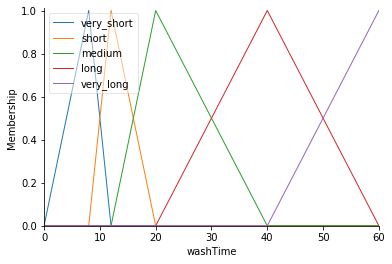

In [21]:
#Machine a laver

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#import matplotlib.pyplot as plt

# Creation des entres et sorties de la logique floue
degreeDirt = ctrl.Antecedent(np.arange(0, 101, 1), 'degreeDirt')
typeDirt = ctrl.Antecedent(np.arange(0, 101, 1), 'typeDirt')

washTime = ctrl.Consequent(np.arange(0, 61, 1) , 'washTime')

DirtNames = ['Low','Medium','High']
degreeDirt.automf(names= DirtNames)

typeName = ['NonFat','Medium','Fat']
typeDirt.automf(names= typeName)


washTime['very_short'] = fuzz.trimf(washTime.universe, [0, 8, 12])
washTime['short'] = fuzz.trimf(washTime.universe, [8 , 12, 20])
washTime['medium'] = fuzz.trimf(washTime.universe, [12, 20, 40])
washTime['long'] = fuzz.trimf(washTime.universe, [20, 40, 60])
washTime['very_long'] = fuzz.trimf(washTime.universe, [40 , 60, 60])

degreeDirt.view()
typeDirt.view()
washTime.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x23907a606c8>)

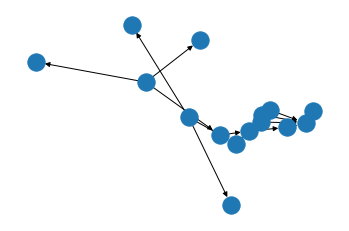

In [22]:
#FAT
rule1 = ctrl.Rule(degreeDirt['High'] | typeDirt['Fat'] , washTime['very_long'])
rule2 = ctrl.Rule(degreeDirt['Medium'] | typeDirt['Fat'] , washTime['long'])
rule3 = ctrl.Rule(degreeDirt['Low'] | typeDirt['Fat'] , washTime['long'])

#MEDIUM
rule4 = ctrl.Rule(degreeDirt['High'] | typeDirt['Medium'] , washTime['long'])
rule5 = ctrl.Rule(degreeDirt['Medium'] | typeDirt['Medium'] , washTime['medium'])
rule6 = ctrl.Rule(degreeDirt['Low'] | typeDirt['Medium'] , washTime['medium'])

#NONFAT
rule7 = ctrl.Rule(degreeDirt['High'] | typeDirt['NonFat'] , washTime['medium'])
rule8 = ctrl.Rule(degreeDirt['Medium'] | typeDirt['NonFat'] , washTime['short'])
rule9 = ctrl.Rule(degreeDirt['Low'] | typeDirt['NonFat'] , washTime['very_short'])

rule1.view()

28.84226190476189


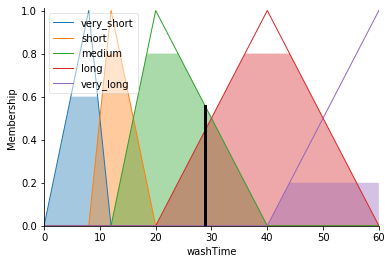

In [23]:
#Add all rules in a rules Array
rules = [rule1, rule2, rule3, rule4 ,rule5, rule6, rule7, rule8, rule9]

#Push rules to system
washTime_ctrl =  ctrl.ControlSystem(rules)

washTimeSimulation = ctrl.ControlSystemSimulation(washTime_ctrl)

washTimeSimulation.input['degreeDirt'] = 60
washTimeSimulation.input['typeDirt'] = 20

washTimeSimulation.compute()

washTime.view(sim=washTimeSimulation)

print(washTimeSimulation.output['washTime'])
